## Preparation

Loading the dataset about breast cancer:


*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)

* perimeter

* area

* smoothness (local variation in radius lengths)

* compactness (perimeter^2 / area - 1.0)

* concavity (severity of concave portions of the contour)

* concave points (number of concave portions of the contour)

* symmetry

* fractal dimension (“coastline approximation” - 1)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter(action="ignore")

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                            columns=np.append(cancer['feature_names'], ['target']))

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## Data Inspection/Exploration

In [ ]:
#df.replace({'target': 1}, "benign", inplace=True)
#df.replace({'target': 0}, "malignant", inplace=True)

In [ ]:
df['target'].value_counts()


1.0    357
0.0    212
Name: target, dtype: int64

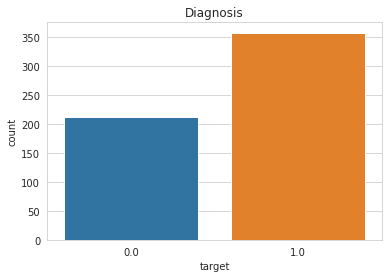

In [ ]:
# inspect the distribution

sns.countplot(data = df, x='target')
plt.title('Diagnosis');

In [ ]:
#inspect the data and columns
# count number of empty values in each column
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
#look at the data types to see which columns need to be encoded
df.dtypes


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [ ]:
#define X and y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

## 1) Split the Data into Train/Test

In [ ]:
from sklearn.model_selection import train_test_split
# use random state 42
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)


(398, 30)
(171, 30)
(171,)
(398,)


In [ ]:
# feature scaling - standardscaler
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# scaled arrays



## Create Classifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:


#adding the input and first hidden layer

model=Sequential()
model.add(Dense(15,activation="relu",input_dim=30))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))



In [ ]:
#compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:

#show model summary


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                465       
                                                                 
 dense_1 (Dense)             (None, 6)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 568
Trainable params: 568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# see if you can reproduce the parameters from input to hidden layer:

print(X_train.shape[1] * 15 + 15)

#(dimension of W_1)

# first hidden to second hidden layer
print(15 *6 +6)
#(dimension of W_2))


# second hidden to output layer
print(6 * 1 +1)
#(dimension of W_3 )

465
96
7


In [ ]:
#fit the model
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))



Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 0.7084 - accuracy: 0.6307 - val_loss: 0.6433 - val_accuracy: 0.6550
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5841 - accuracy: 0.6809 - val_loss: 0.5391 - val_accuracy: 0.7076
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5007 - accuracy: 0.7337 - val_loss: 0.4586 - val_accuracy: 0.7719
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4337 - accuracy: 0.7965 - val_loss: 0.3944 - val_accuracy: 0.8480
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3797 - accuracy: 0.8543 - val_loss: 0.3366 - val_accuracy: 0.9123
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3306 - accuracy: 0.9020 - val_loss: 0.2878 - val_accuracy: 0.9240
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2887 - accuracy: 0.9322 - val_loss: 0.2471 - val_accuracy: 0.9298
Epoch 8/100


In [ ]:
#evaluate the model and save it into the variable score
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.06046389415860176, 0.988304078578949]

The metrics that *evaluate()* gives us depend on the input argument *metrics* that we used when setting up our NN. Keras knows several other metrics (see [Keras doc. for details](https://keras.io/metrics/)) but not all known metrics are supported for training the NN. Between, you can also extend the set of metrics with customer metrics (see this [example](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/) if interested.).

We also have access to model performance results via the result of *model.fit()*, that is our variable *story*.

In [ ]:
# Now install the tensorflow addons and define the following metrics. You have AUC,Precision and Recall in Keras Metrics but F1 you will need to get it from tensorflow addons


In [ ]:
!pip install tensorflow-addons



     |████████████████████████████████| 1.1 MB 4.2 MB/s 


In [ ]:
import keras
import tensorflow as tf 
import tensorflow_addons as tfa


metrics = [ 
    #keras.metrics.Precision(),
    #keras.metrics.Recall(),
    keras.metrics.AUC(),
    #tfa.metrics.F1Score(
    #    name="f1_micro",
    #    average="micro",
    #    num_classes=1,
    #    threshold=0.5,
    #),
    #tfa.metrics.F1Score(
    #    name="f1_weighted",
    #    average="weighted",
    #    num_classes=1,
    #    threshold=0.5,
    #),
]

In [ ]:
# rerun the mmodel with the above defined metrics in your complie call
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy', keras.metrics.AUC()])

story = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))


Epoch 1/100
13/13 [==============================] - 1s 29ms/step - loss: 0.0224 - accuracy: 0.9925 - auc_1: 0.9999 - val_loss: 0.0609 - val_accuracy: 0.9883 - val_auc_1: 0.9902
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.9925 - auc_1: 1.0000 - val_loss: 0.0600 - val_accuracy: 0.9883 - val_auc_1: 0.9902
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.9925 - auc_1: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9883 - val_auc_1: 0.9902
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.9925 - auc_1: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9825 - val_auc_1: 0.9902
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0182 - accuracy: 0.9925 - auc_1: 1.0000 - val_loss: 0.0613 - val_accuracy: 0.9883 - val_auc_1: 0.9906
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0177 - accuracy: 0.9925 - auc_1: 1.0000

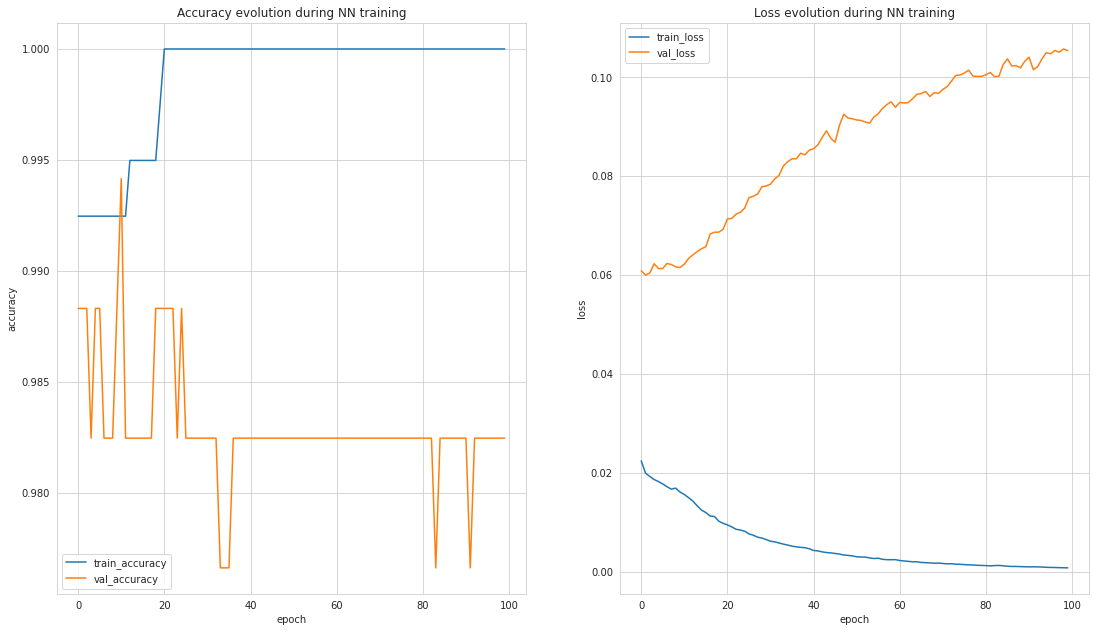

In [ ]:
# print Test Loss and Accuracy and plot the history
import matplotlib.pyplot as plt

def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'val_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'val_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show()

show_history(story)

Typically validation loss should be similar to but slightly higher than training loss. As long as validation loss is lower than or even equal to training loss one should keep doing more training. If training loss is reducing without increase in validation loss then again keep doing more training. If validation loss starts increasing then it is time to stop. Some over-fitting is nearly always a good thing. All that matters in the end is: is the validation loss as low as you can get it!

If overall accuracy still not acceptable then review mistakes model is making and think of what can one change: More data? More / different data augmentations? Different architecture?



In [ ]:
# Compute predictions of X_test
yhat = model.predict(X_test)
yhat

array([[9.9905062e-01],
       [5.6225968e-18],
       [1.6278195e-12],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [6.6331809e-33],
       [2.8600146e-08],
       [7.5968850e-01],
       [1.0000000e+00],
       [6.4316201e-01],
       [2.0022181e-08],
       [9.9999940e-01],
       [1.8524943e-08],
       [1.0000000e+00],
       [1.2428638e-16],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.6285921e-24],
       [9.9999797e-01],
       [1.0000000e+00],
       [2.9735537e-34],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999917e-01],
       [1.0000000e+00],
       [3.3270953e-21],
       [9.9999982e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [8.5101724e-03],
       [9.9999928e-01],
       [2.2839539e-16],
       [9.9966800e-01],
       [1.0000000e+00],
       [1.929001

In [ ]:
# Finding the most probable class
yhat_c = (yhat > 0.5)
print(yhat_c)


[[ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 

In [ ]:
# print the confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
cm = confusion_matrix(y_test,yhat_c)
score = accuracy_score(y_test,yhat_c)
auc = roc_auc_score(y_test,yhat)
print(cm)
print('accuracy is:',score)
print('auc is:',auc)

[[ 62   1]
 [  2 106]]
accuracy is: 0.9824561403508771
auc is: 0.9961787184009406


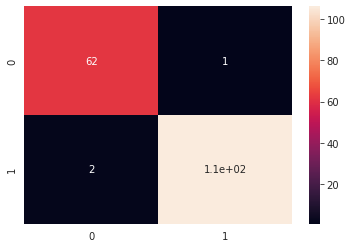

In [ ]:
import seaborn as sn
sn.heatmap(cm, annot=True)

In [ ]:
 #print calssification report
 from sklearn.metrics import classification_report

 print(classification_report(y_test, yhat_c))



              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        63
         1.0       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

Ok that worked out. Now remember that we were rather critical with classification accuracy in the lecture. Let's revisit why we do not like this measure.

Classification accuracy is a threshold metric. It calculates model performance for one threshold or classification cut-off. If not specified, this threshold is usually set to 0.5.  However that is not what we necessarily want in an unbalanced case.

A preferable approach to assess classification performance is to consider all possible thresholds. This is what receiver-operating-characteristics (ROC) analysis does. 

Classification accuracy simply calculates the number of correct class predictions (main diagonal) over all cases. Correct predictions are twofold. We can classify a good customer as good customer and we can classify a bad customer as bad customer. Likewise, our classifier can make two errors, classifying an actually good customer as bad and classifying an actually bad customer as good. We find the numbers of these errors in the off-diagonal of the confusion matrix. Which class a model predicts depends on the classification threshold. You classify cases as BAD if $p(y=BAD|x) \gt \tau$, and as GOOD otherwise, whereby $\tau$ denotes the threshold. 

Hence, the above **confusion table is based on one threshold**. It might look rather different for another threshold. A ROC curve considers all cut-offs $\tau \in [0,1]$ plotting the **True Positive Rate** and **False Positive Rate** for each threshold. Given that ROC analysis is a general tool for binary classification, and used in various domains, people came up with a standardized terminology to refer to the classes. Instead of speaking about goods and bads (i.e., credit scoring jargon) or zeros and ones (which is likely to offend members of the former group), we refer to the classes as the *positive* and the *negative* class. Thus, the TPR is the fraction cases that the classifier predicts to be of class positive, and that actually belong to that class. The true negative rate or TNR is defined alike. For the two errors we have the false positive rate (FPR) and the false negative rate (FNR). Correct interpretation of these errors is maybe a little difficult. How about false positives? The classifier predicts class positive but the prediction is false. Such a case actually belongs to the negative class. So the FPR is the fraction of cases that the classifier predicts as positives and that actually are negatives. The same argumentation goes for the FNR.  

## ROC Curve and AUC
This is one of the most important evaluation metrics in classification analysis. Have a look at the graph below. The curve tells us how well the model differentiates the two classes, in regards to their predicted probabilities. A ROC curve has the FPR on the X-axis and TPR on the Y-axis. The curve is derived from all the different combinations of TPR and FPR (i.e., confusion tables) across all possible thresholds  0≤𝜏≤1  (assuming we have probabilistic predictions).

The AUC stand for the area under the curve and is a ranking indicator. The AUC estimates the probability that a randomly chosen positive instance is correctly ranked higher than a randomly chosen negative (Hanley and McNeil, 1983). We calculate this area, as our goal is to have a FPR of 0 and a TPR of 1. This would be the perfect model. This point is in the top right corner of a ROC Curve. So the closer we get to that point, the better the model and the bigger the area under it. It is common practice to add a horizontal line to the plot. You can show that this line corresponds to a random classifier. So any serious model should give a ROC curve (much) above the horizontal line. This also implies that a classifier should display AUC (much) bigger than 0.5.



In [ ]:
## ROC Curve and AUC
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve


fpr , tpr , thresholds = roc_curve( y_test , yhat)

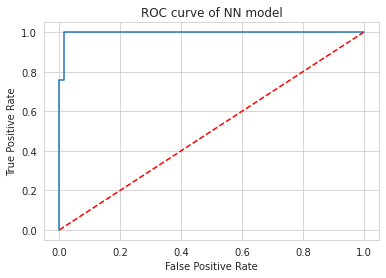

In [ ]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  #plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve of NN model')
  plt.plot([0, 1], [0, 1], "r--");  # the random benchmark we need to add manually  
  plt.show()    
  
plot_roc_curve (fpr,tpr)


In [ ]:
# get the best threshold for the NN model
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold NN model=%f' % (best_thresh))


Best Threshold NN model=0.109172


In [ ]:
# Finding the most probable class based on the optimal threshold
yhat_c_optimal = (yhat > 0.109172)
print(yhat_c_optimal)

In [ ]:
 print(classification_report(y_test, yhat_c_optimal))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        63
         1.0       0.99      1.00      1.00       108

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
cm_optimal = confusion_matrix(y_test,yhat_c_optimal)
score_optimal = accuracy_score(y_test,yhat_c_optimal)
auc_optimal = roc_auc_score(y_test,yhat)
print(cm_optimal)
print('accuracy is:',score_optimal)


[[ 62   1]
 [  0 108]]
accuracy is: 0.9941520467836257



# OPTION 2
Lets implement the same model with softmax output activation and 2 nodes. REMEMBER, the binary classification case is a special case of the multiclass classification case with 2 classes. so the softmax function with only 2 classes will give the sigmoid function. 
MEaning, when you have a binary classification problem, have 2 options
1.  output activation sigmoid, 1 node and binary_crossentropy loss
2. output activation softmax, 2 nodes and categorical_crossentropy loss

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# Prepare the target variable

# if you use categorical crossentropy loss, you have to reshape the target variable to the dimension of the classes,
# ie. OneHot encode the Target
# Note: you can leave the target as normal integers, but then you have to use 'sparse_categorical_crossentropy' loss
dummy_y = np_utils.to_categorical(y)
dummy_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
# use random state 42
X_train,X_test,y_train,y_test=train_test_split(X,dummy_y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)


(398, 30)
(171, 30)
(171, 2)
(398, 2)


In [ ]:
# feature scaling - standardscaler
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# scaled arrays

In [ ]:
model=Sequential()
model.add(Dense(15,activation="relu",input_dim=30))
model.add(Dense(6,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [ ]:
#fit the model
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))


Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.6392 - accuracy: 0.5729 - val_loss: 0.5941 - val_accuracy: 0.6667
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5263 - accuracy: 0.7990 - val_loss: 0.4885 - val_accuracy: 0.8480
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4350 - accuracy: 0.8819 - val_loss: 0.3980 - val_accuracy: 0.9006
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3638 - accuracy: 0.9045 - val_loss: 0.3260 - val_accuracy: 0.9298
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3086 - accuracy: 0.9271 - val_loss: 0.2699 - val_accuracy: 0.9415
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2677 - accuracy: 0.9397 - val_loss: 0.2270 - val_accuracy: 0.9474
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2369 - accuracy: 0.9422 - val_loss: 0.1960 - val_accuracy: 0.9532
Epoch 8/100


In [ ]:
# Compute predictions of X_test, here it is a 2 dimensional array: for each datapoint we get the probability of 
# it belonging to class 0 and to class 1. Note: compare the output to the previous yhat. Previously with 1 output neuron, 
#we got the prob only for class 1.  
yhat = model.predict(X_test)
yhat

array([[1.95391849e-02, 9.80460823e-01],
       [1.00000000e+00, 4.18655692e-12],
       [1.00000000e+00, 1.47374335e-08],
       [6.29030546e-05, 9.99937057e-01],
       [9.27261226e-06, 9.99990702e-01],
       [1.00000000e+00, 6.60413752e-28],
       [1.00000000e+00, 6.54429515e-22],
       [9.99932170e-01, 6.77804637e-05],
       [7.57163405e-01, 2.42836580e-01],
       [4.34116737e-05, 9.99956608e-01],
       [4.24893051e-02, 9.57510769e-01],
       [9.99961972e-01, 3.80745587e-05],
       [1.54742191e-03, 9.98452544e-01],
       [9.99711096e-01, 2.88920564e-04],
       [3.23613858e-05, 9.99967694e-01],
       [9.99999166e-01, 8.16380066e-07],
       [6.33589661e-05, 9.99936581e-01],
       [4.51023652e-06, 9.99995470e-01],
       [5.50071718e-07, 9.99999404e-01],
       [1.00000000e+00, 3.45875607e-16],
       [3.04132774e-02, 9.69586670e-01],
       [2.48600822e-03, 9.97514009e-01],
       [1.00000000e+00, 1.00184445e-22],
       [1.08735039e-04, 9.99891281e-01],
       [3.484346

In [ ]:
# Finding the most probable class
yhat_c = np.argmax(yhat, axis=1)
print(yhat_c)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [ ]:
y_test.shape

(171, 2)

In [ ]:
true_label = np.argmax(y_test,axis = 1)


In [ ]:

cm = confusion_matrix(true_label,yhat_c)

score = accuracy_score(true_label,yhat_c)
print(cm)
print('score is:',score)


[[ 62   1]
 [  0 108]]
score is: 0.9941520467836257
